In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head(10)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [2]:
# Drop the non-beneficial ID columns.
# Note: dropped extra columns b/c >99% of records STATUS=1 & SPEC. CONSID.=N 
application_df = application_df.drop(columns = ["EIN", "NAME", "STATUS", "SPECIAL_CONSIDERATIONS"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_values = application_df.APPLICATION_TYPE.value_counts()
application_values

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_values[application_values<1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_values = application_df.CLASSIFICATION.value_counts()
classification_values.head(10)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_values[classification_values<4000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [8]:
# Look at ASK_AMT value counts for binning
ask_amt_values = application_df.ASK_AMT.value_counts()
ask_amt_values.head()

5000     25398
10478        3
15583        3
63981        3
6725         3
Name: ASK_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

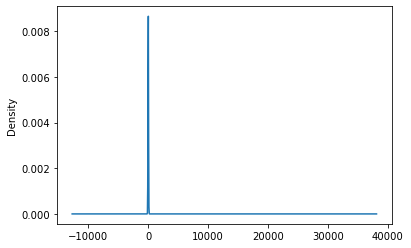

In [9]:
# Visualize value counts of ASK_AMT
ask_amt_values.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
ask_amt_0 = application_df['ASK_AMT'][application_df['ASK_AMT'] == 5000]
ask_amt_1 = application_df['ASK_AMT'][application_df['ASK_AMT'] > 5000]

# Replace in dataframe
for amt in ask_amt_0:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,"=5000")
for amt in ask_amt_1:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,">5000")
  
# why is this red?
application_df.ASK_AMT.value_counts()

=5000    25398
>5000     8901
Name: ASK_AMT, dtype: int64

In [11]:
# Look at USE_CASE value counts for binning
use_case_values = application_df.USE_CASE.value_counts()
use_case_values.head(10)

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(use_case_values[use_case_values<20000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.USE_CASE = application_df.USE_CASE.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.USE_CASE.value_counts()

Preservation    28095
Other            6204
Name: USE_CASE, dtype: int64

In [13]:
# Generate our categorical variable lists 19.4.2
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'ASK_AMT']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list 19.4.3
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_=5000,ASK_AMT_>5000
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# Merge one-hot encoded features and drop the originals 19.4.3
application_df = application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

/Users/hollyesmith/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_=5000,ASK_AMT_>5000
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# Split our preprocessed data into our features and target arrays 19.4.3
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/hollyesmith/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# ATTEMPT 1 - added neurons (Over AlphabetSoupCharity initial attempt)

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. 19.4.4
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3400      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,501
Trainable params: 8,501
Non-trainable params: 0
_________________________________________________________________


2022-06-29 11:37:51.345933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# Import checkpoint dependencies 19.6.1
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model 19.6.1
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Create a callback that saves the model's weights every 5 epochs 19.6.1
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [23]:
# Train the model 19.4.5
fit_model = nn.fit(X_train,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5757 - accuracy: 0.7193
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5607 - accuracy: 0.7270
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5584 - accuracy: 0.7299
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5570 - accuracy: 0.7302
Epoch 5/50
745/804 [==========================>...] - ETA: 0s - loss: 0.5559 - accuracy: 0.7308
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7310
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7308
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7319
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7320
Epoch 9/50
804/804 [==============================] - 1s 1ms/s

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 2.0393 - accuracy: 0.6540 - 315ms/epoch - 1ms/step
Loss: 2.0393288135528564, Accuracy: 0.6539941430091858


In [25]:
# ATTEMPT 2 - ONE EXTRA LAYER, MORE NODES

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. 19.4.4
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3400      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 30)                1530      
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Import checkpoint dependencies 19.6.1
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [28]:
# Compile the model 19.6.1
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Create a callback that saves the model's weights every 5 epochs 19.6.1
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5000)

In [30]:
# Train the model 19.4.5
fit_model = nn.fit(X_train,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5755 - accuracy: 0.7188
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5606 - accuracy: 0.7283
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5584 - accuracy: 0.7286
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5576 - accuracy: 0.7311
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7311
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5556 - accuracy: 0.7318
Epoch 7/50
164/804 [=====>........................] - ETA: 0s - loss: 0.5457 - accuracy: 0.7384
Epoch 7: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7322
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7324
Epoch 9/50
804/804 [==============================] - 1s 1ms/s

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 2.7328 - accuracy: 0.6632 - 310ms/epoch - 1ms/step
Loss: 2.732785224914551, Accuracy: 0.6632069945335388


In [32]:
# ATTEMPT 3 - BACK TO TWO LAYERS & NODES FROM ATTEMPT 1, CHANGE ACTIVATION FUNCTION, INCREASED # OF EPOCHS

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. 19.4.4
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                2720      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,181
Trainable params: 5,181
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Import checkpoint dependencies 19.6.1
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [35]:
# Compile the model 19.6.1
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Create a callback that saves the model's weights every 5 epochs 19.6.1
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5000)

In [37]:
# Train the model 19.4.5
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6051 - accuracy: 0.7005
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5750 - accuracy: 0.7264
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5678 - accuracy: 0.7275
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5643 - accuracy: 0.7289
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5696 - accuracy: 0.7283
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5628 - accuracy: 0.7299
Epoch 7/100
156/804 [====>.........................] - ETA: 0s - loss: 0.5627 - accuracy: 0.7282
Epoch 7: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5631 - accuracy: 0.7307
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5626 - accuracy: 0.7308
Epoch 9/100
804/804 [==============================] -

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 6.3383 - accuracy: 0.5577 - 277ms/epoch - 1ms/step
Loss: 6.3382768630981445, Accuracy: 0.55766761302948


In [39]:
# Export to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")